<h1 style="text-align:center"><b>Coding Challenge - Consumer Prices Division, Data Science team</b></h1>

<p>The Consumer Prices Division (CPD) is undergoing a transition to utilize new data sources to enable better calculation of the Consumer Price Index (CPI). This involves interpreting unstructured text data sources, such as a product description provided by a retailer, to identifying where products fit in the CPI taxonomy. The Data Science team at CPD are responsible for developing supervised and unsupervised methods to do this, and is looking for qualified candidates to support this work.</p>

<b>Goal of assignment:</b><br>
The following assignment is provided so that you can demonstrate your skills and experience along with the intervew. You have 3 days to complete tis assignment and email it to serge.goussev@canada.ca. This assignment should take you ~4 hours to complete. It is designed to test your knowledge/skills:

The application of analytical and statistical concepts, theories and techniques;Thinking Things Through.<br><br>
<b>How to submit your assignment</b><br>

<p>Complete the assignment in either R or Python, and include good documention, explaining how you worked through each question and assumptions or tests you made. The format how you complete the documentation is up to you -- for instance in a separate markdown file, a jupyter notebook together with the code, etc.</p>

<b>Please note: due to possible firewall issues in receiving emails, make sure to convert your files to either .txt if they are code, or .html if they are jupyter notebooks, and provide instructions on how to convert them back to the original format.</b>

<br><br>
<h2><b>Candidate Name:</b> Arpit Rathore</h2>


<h2><b>Question 1</h2></b>

<p>Go to the UCI page and download the data (click Download: Data Folder and download online_retail_II.xlsx). Use the file to answer the following questions using the 2009-2010 data:</p>

In [1]:
#Importing the libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import plotly
import plotly.express as px
import plotly.graph_objects as go

#importing NLP required libraries 
import nltk
nltk.download('stopwords')
import re
nltk.download('punkt')
import string
from nltk.corpus import stopwords #stopword library
stop = stopwords.words('english') #initialization of stopword function
from nltk.tokenize import word_tokenize # tokenizaiton library
from nltk.corpus import stopwords       # stopword library
from nltk.stem import WordNetLemmatizer #lemmatizer library
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance_matrix

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import snowballstemmer
stemmer = snowballstemmer.EnglishStemmer()

re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): 
    tokens = re_tok.sub(r' \1 ', s).split()
    return stemmer.stemWords(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#importing the required sheet from whole datatset
sales_data_raw = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/online_retail_II (1).xlsx',sheet_name=0)

In [3]:
sales_data_raw.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
#descriptive statistics of the numerical features
sales_data_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,525461.0,10.337667,107.424110,-9600.00,1.00,3.0,10.00,19152.00
Price,525461.0,4.688834,146.126914,-53594.36,1.25,2.1,4.21,25111.09
Customer ID,417534.0,15360.645478,1680.811316,12346.00,13983.00,15311.0,16799.00,18287.00


In [5]:
#information of the dataset
sales_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
#looking into the null/missing values in each features
sales_data_raw.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [7]:
#checking the number of unique values in each features
sales_data_raw.nunique()

Invoice        28816
StockCode       4632
Description     4681
Quantity         825
InvoiceDate    25296
Price           1606
Customer ID     4383
Country           40
dtype: int64

In [8]:
#dropping the missing values containing rows
sales_data_raw.dropna(axis=0,how='any',inplace=True)

In [9]:
#items whose price is negative
neg_price = sales_data_raw[sales_data_raw['Price'] < 0].sum() 

#items whose quantity is negative
neg_quantity = sales_data_raw[sales_data_raw['Quantity'] < 0].count()

<h3><b>Part A</b></h3>
<p>For 2009-2010, what item has sold in the highest quantity overall? Create a chart with its monthly sales.</p>

<b>Item sold most in whole database based on the amount of records they appear in whole dataset</b><br>
<b>Result: </b>WHITE HANGING HEART T-LIGHT HOLDER

In [10]:
# explore and visualize the most sales items within this time period. 
most_sold = sales_data_raw['Description'].value_counts().head(15)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

WHITE HANGING HEART T-LIGHT HOLDER    3245
REGENCY CAKESTAND 3 TIER              1872
STRAWBERRY CERAMIC TRINKET BOX        1536
ASSORTED COLOUR BIRD ORNAMENT         1376
HOME BUILDING BLOCK WORD              1229
PACK OF 72 RETRO SPOT CAKE CASES      1214
60 TEATIME FAIRY CAKE CASES           1195
REX CASH+CARRY JUMBO SHOPPER          1195
JUMBO BAG RED RETROSPOT               1114
LUNCH BAG RED SPOTTY                  1112
BAKING SET 9 PIECE RETROSPOT          1082
RED HANGING HEART T-LIGHT HOLDER      1054
HEART OF WICKER LARGE                 1051
WOODEN FRAME ANTIQUE WHITE            1050
LUNCH BAG  BLACK SKULL.               1035
Name: Description, dtype: int64


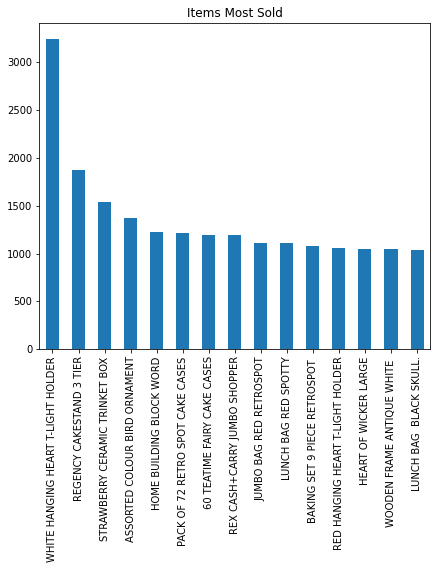

In [11]:
#A bar plot of the support of most frequent items bought.
plt.figure(figsize=(7,6))
most_sold.plot(kind='bar')
plt.title('Items Most Sold')
plt.show()

<b>Item sold most in whole database based on the amount of the quantity.</b><br>
<b>Result: </b>WHITE HANGING HEART T-LIGHT HOLDER

In [12]:
#creating the dataframe containing the grouped data by description and sum the resultant group values by description 
sales_most_items = pd.DataFrame(sales_data_raw.groupby(['Description']).Quantity.sum().sort_values(ascending=False).reset_index())

In [13]:
sales_most_items.head()

,Description,Quantity
0,WHITE HANGING HEART T-LIGHT HOLDER,55861
1,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54274
2,BROCADE RING PURSE,47430
3,PACK OF 72 RETRO SPOT CAKE CASES,44507
4,ASSORTED COLOUR BIRD ORNAMENT,44120


In [14]:
#using plotly to create the car chart.
fig = px.bar(sales_most_items[0:20], y='Quantity', x='Description',
             color=sales_most_items.Quantity[0:20], title='Top 20 Most Sold Item in 2009-10',
             )
fig.update_layout(
    xaxis_title="Products",
    font=dict(
        family="Courier New, monospace",
        color="RebeccaPurple"
    ))
fig.show()

<b>WHITE HANGING HEART T-LIGHT HOLDER's monthly sales.</b><br>

In [15]:
#creating the month and year feature in the dataset
sales_data_raw['month_year'] = pd.to_datetime(sales_data_raw['InvoiceDate']).dt.to_period('M')

In [16]:
#extracting the rows where description is matching with our top sold item.
sales = sales_data_raw.query('Description =="WHITE HANGING HEART T-LIGHT HOLDER"')

In [17]:
#grouping the dataset on the description then sum these quantities in each description.
white_month_sales = pd.DataFrame(sales.groupby(['month_year']).Quantity.sum().sort_values(ascending=False).reset_index())

In [18]:
#monthly sales of our top sold item
white_month_sales

,month_year,Quantity
0,2010-11,6290
1,2009-12,6204
2,2010-01,5380
3,2010-03,4718
4,2010-05,4384
5,2010-06,4288
6,2010-09,4279
7,2010-08,4224
8,2010-10,4077
9,2010-07,3860


In [19]:
#Plotting the onthly sales of the top sold item.
x = ['Nov-2010', 'Dec-2009', 'Jan-2010','March-2010','May-2010','June-2010','Sept-2010','Aug-2010','Oct-2010'
      ,'July-2010','April-2010','Feb-2010','Dec-2010']
white_month_sales_fig = px.bar(white_month_sales, y='Quantity', x=x,
             color=white_month_sales.Quantity, title='',
             )
white_month_sales_fig.update_layout(
    title="Monthly Sales of WHITE HANGING HEART T-LIGHT HOLDER in 2009-10",
    xaxis_title="Months and Year",
    font=dict(
        family="Courier New, monospace",
        color="RebeccaPurple"
    )
)
white_month_sales_fig.show()

<h2><b>Part B</h2></b>
<p>For 2009-2010, plot the number of total items sold per week in each of the top 5 selling countries (top as in sold the most total items over the 2009-2010 data period), excluding the United Kingdom. Show this as a single line plot with a line for each country.</p>

<p>Separately, plot the number of orders per week for the 5 countries (excluding United Kingdom) with the highest number of orders in the 2009-2010 data period.</p>

<b>Plooting the monthly sales for whole dataset</b>

In [20]:
#grouping the dataset on the month_year then sum these quantities in each month_year.
monthly_sales = pd.DataFrame(sales_data_raw.groupby(['month_year']).Quantity.sum().sort_values(ascending=False).reset_index())

In [21]:
#changing the data type of month_year from datetime64 to category
monthly_sales.month_year.astype('category')

0     2010-11
1     2010-10
2     2010-03
3     2010-09
4     2010-08
5     2009-12
6     2010-06
7     2010-05
8     2010-01
9     2010-02
10    2010-04
11    2010-07
12    2010-12
Name: month_year, dtype: category
Categories (13, period[M]): [2009-12, 2010-01, 2010-02, 2010-03, ..., 2010-09, 2010-10, 2010-11,
                             2010-12]

In [22]:
#Plotting the monthly sales for year 2009-10
x = ['Nov-2010', 'Oct-2010', 'March-2010','Sept-2010','Aug-2010','Dec-2009','June-2010','May-2010','Jan-2010'
      ,'Feb-2010','April-2010','July-2010','Dec-2010']
monthly_sales_fig = px.bar(monthly_sales, y='Quantity', x=x,
             color=monthly_sales.Quantity, title='',
             )
monthly_sales_fig.update_layout(
    title="Monthly Sales in 2009-10",
    xaxis_title="Months and Year",
    font=dict(
        family="Courier New, monospace",
        color="RebeccaPurple"
    )
)
monthly_sales_fig.show()

<b>Plotting the number of total items sold per week in each of the top 5 selling countries (top as in sold the most total items over the 2009-2010 data period), excluding the United Kingdom. Show this as a single line plot with a line for each country.</b>

In [23]:
#extracting the sales of each country by grouping based on each country and sum row's quantity at the end.
Top5_sale_country = pd.DataFrame(sales_data_raw.groupby(['Country']).Quantity.sum().sort_values(ascending=False).reset_index())
Top5_sale_country.head(6)

,Country,Quantity
0,United Kingdom,4344969
1,Denmark,227030
2,Netherlands,181823
3,EIRE,177044
4,Germany,107133
5,France,73490


In [24]:
#extracting the sales of top 5 country based on the previous row.
top5_country_sales = sales_data_raw.query('Country==["Denmark","Netherlands","EIRE","Germany","France"]')

In [25]:
#converting dates into weekly sales
top5_country_sales['InvoiceDate'] = pd.to_datetime(top5_country_sales['InvoiceDate']) - pd.to_timedelta(7, unit='d')

In [26]:
#plotting the weekly sales of the top 5 countries in 2009-10
fig = px.line(top5_country_sales, x="InvoiceDate", y="Quantity", color='Country')
fig.update_layout(
    title="Weekly Sales of the top 5 countries in 2009-10",
    xaxis_title="Months and Year",
    font=dict(
        family="Courier New, monospace",
        color="RebeccaPurple"
    ))
fig.show()

<b>Separately, plot the number of orders per week for the 5 countries (excluding United Kingdom) with the highest number of orders in the 2009-2010 data period.</b>

In [27]:
#calculating the number of orders for each country 
sales_data_raw['Country'].value_counts().head(6)

United Kingdom    379423
EIRE                8710
Germany             8129
France              5710
Netherlands         2769
Spain               1278
Name: Country, dtype: int64

In [28]:
#extracting the values for top 5 countries based on previous result.
top5_country_order = sales_data_raw.query('Country==["EIRE","Germany","France","Netherlands","Spain"]')

In [29]:
#Converting the date into weekly dates
top5_country_order['InvoiceWeek'] = pd.to_datetime(top5_country_order['InvoiceDate']) - pd.to_timedelta(7, unit='d')

In [30]:
top5_country_order = top5_country_order['Country'].value_counts()

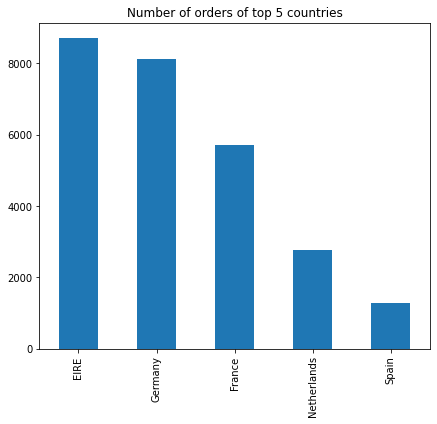

In [32]:
#Plotting orders per week for the 5 countries (excluding United Kingdom) with the highest number of orders in the 2009-2010 data period.
plt.figure(figsize=(7,6))
top5_country_order.plot(kind='bar')
plt.title('Number of orders of top 5 countries')
plt.show()

<h2><b>Part C</h2></b>
<p> If (price == unit price)</p>

<p>For 2009-2010, show a table (dataframe) of the average invoice value (over all of 2009-2010 data) by country, shown in ascending invoice value. Exclude any rows that have returns (quantities that are negative) from the averages shown.</p>

<p>Make the same table again but include only orders where the total number of items (eg: total quantity for the order) was 10 items or fewer.</p>

<b>For 2009-2010, show a table (dataframe) of the average invoice value (over all of 2009-2010 data) by country, shown in ascending invoice value. Exclude any rows that have returns (quantities that are negative) from the averages shown.</b>

In [33]:
#creating the new feature which is actually a total cost of each order by calculating price x quantity.
sales_data_raw['Invoice_value'] = sales_data_raw['Price'] * sales_data_raw['Quantity'] 

In [34]:
sales_data_raw.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,month_year,Invoice_value
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12,30.0


In [35]:
#not considering if the value of invoice is less than 0.
sales_data = sales_data_raw.query('Invoice_value >0.0')

In [36]:
positive_sales = sales_data.groupby('Country').sum().sort_values('Invoice_value', ascending=False)

In [37]:
#plotting the figure containing Total Sales in 2009-10 for each country
positive_sales_fig = px.bar(positive_sales, y='Invoice_value', x=positive_sales.index,
             color=positive_sales.Invoice_value
             )
positive_sales_fig.update_layout(
    title="Invoice Sales in 2009-10",
    xaxis_title="Countries",
    font=dict(
        family="Courier New, monospace",
        color="RebeccaPurple"
    )
)
positive_sales_fig.show()

<b>Make the same table again but include only orders where the total number of items (eg: total quantity for the order) was 10 items or fewer.</b>

In [38]:
#extracting the data where the total number of items (eg: total quantity for the order) was 10 items or fewer.
sales_data_10_or_less = sales_data.query('Quantity<=10')

In [39]:
ten_or_less_sales = sales_data_10_or_less.groupby('Country').sum().sort_values('Invoice_value', ascending=False)

In [40]:
#Plotting the Invoice Sales for each country for year 2009-10.
ten_or_less_sales_fig = px.bar(ten_or_less_sales, y='Invoice_value', x=positive_sales.index,
             color=ten_or_less_sales.Invoice_value
             )
ten_or_less_sales_fig.update_layout(
    title="Invoice Sales in 2009-10",
    xaxis_title="Countries",
    font=dict(
        family="Courier New, monospace",
        color="RebeccaPurple"
    )
)
ten_or_less_sales_fig.show()

<b><h2>Part D</b></h2>
<p>What is the most common pair of items to appear in the same order? Ignore the quantity of each item when doing this analysis (so an order of [10xItem A, 5xItem B], would be the same as an order of [1xItem A, 1xItem B]).</p>

<b> Note: I have taken on GERMANY data</b>

In [41]:
country = 'Germany'
pair_data = sales_data[sales_data['Country'] == country]

In [42]:
print("Number of unique invoices : %d " % len(pair_data['Invoice'].value_counts()))
print("Number of unique products : %d " % len(pair_data['Description'].value_counts()))

Number of unique invoices : 347 
Number of unique products : 1612 


In [43]:
# Product sold quantity per invoice
freq = pair_data.groupby(['Invoice', 'Description'])['Quantity'].sum()
freq.head()


Invoice  Description                     
489526   6 RIBBONS RUSTIC CHARM              12
         ANTIQUE SILVER TEA GLASS ETCHED     12
         BIRD DECORATION RED SPOT            24
         BLUE/BROWN DOTS RUFFLED UMBRELLA     3
         EDWARDIAN PARASOL BLACK              6
Name: Quantity, dtype: int64

In [44]:
prod_freq = freq.unstack().fillna(0).reset_index().set_index('Invoice')
prod_freq.head(33)

Description,3 STRIPEY MICE FELTCRAFT,CHERRY BLOSSOM DECORATIVE FLASK,FLAMINGO LIGHTS,RED/WHITE DOT MINI CASES,SET 2 TEA TOWELS I LOVE LONDON,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 MINI TOADSTOOL PEGS,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED SPOTTY,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED SPOTTY,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 STRIPEY MICE FELTCRAFT,36 DOILIES DOLLY GIRL,36 DOILIES SPACEBOY DESIGN,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE RED SPOTTY,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D HEARTS HONEYCOMB PAPER GARLAND,3D STICKERS CHRISTMAS STAMPS,3D STICKERS TRADITIONAL CHRISTMAS,...,WOODEN TREE CHRISTMAS SCANDINAVIAN,WOODEN UNION JACK BUNTING,WOODLAND HEIGHT CHART STICKERS,WOODLAND STICKERS,WOODLAND ANIMAL WRITING SET,WOODLAND CHARLOTTE BAG,WOODLAND DESIGN COTTON TOTE BAG,WOODLAND PARTY BAG + STICKER SET,WOODLAND STORAGE BOX LARGE,WOODLAND STORAGE BOX SMALL,WOODLAND WATER TRANSFER TATTOOS,WOOLLY HAT SOCK GLOVE ADVENT STRING,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP BAD HAIR DAY,WRAP BLIZZARD,WRAP BLUE REINDEER,WRAP BLUE RUSSIAN FOLKART,WRAP CHRISTMAS SCREEN PRINT,WRAP CHRISTMAS VILLAGE,WRAP CIRCUS PARADE,WRAP COWBOYS,WRAP DAISY CARPET,WRAP ENGLISH ROSE,WRAP FOLK ART,WRAP GREEN PEARS,WRAP GREEN RUSSIAN FOLKART,WRAP MONSTER FUN,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP SUKI AND FRIENDS,"WRAP,SUKI AND FRIENDS",YELLOW BROWN BEAR FELT PURSE KIT,YELLOW KNITTED KIDS RUCKSACK,YELLOW PURPLE DAISY FELT PURSE KIT,YELLOW SHARK HELICOPTER,YULETIDE IMAGES GIFT WRAP SET,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
489526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,24.0
490395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,18.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490564,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
491050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [45]:
# Set value to 1 for postivie quantity. Anything else set to 0
product_set = prod_freq.applymap(lambda x : 1 if x > 0 else 0 )
product_set.head(33)

Description,3 STRIPEY MICE FELTCRAFT,CHERRY BLOSSOM DECORATIVE FLASK,FLAMINGO LIGHTS,RED/WHITE DOT MINI CASES,SET 2 TEA TOWELS I LOVE LONDON,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 MINI TOADSTOOL PEGS,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED SPOTTY,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED SPOTTY,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 STRIPEY MICE FELTCRAFT,36 DOILIES DOLLY GIRL,36 DOILIES SPACEBOY DESIGN,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE RED SPOTTY,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D HEARTS HONEYCOMB PAPER GARLAND,3D STICKERS CHRISTMAS STAMPS,3D STICKERS TRADITIONAL CHRISTMAS,...,WOODEN TREE CHRISTMAS SCANDINAVIAN,WOODEN UNION JACK BUNTING,WOODLAND HEIGHT CHART STICKERS,WOODLAND STICKERS,WOODLAND ANIMAL WRITING SET,WOODLAND CHARLOTTE BAG,WOODLAND DESIGN COTTON TOTE BAG,WOODLAND PARTY BAG + STICKER SET,WOODLAND STORAGE BOX LARGE,WOODLAND STORAGE BOX SMALL,WOODLAND WATER TRANSFER TATTOOS,WOOLLY HAT SOCK GLOVE ADVENT STRING,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP BAD HAIR DAY,WRAP BLIZZARD,WRAP BLUE REINDEER,WRAP BLUE RUSSIAN FOLKART,WRAP CHRISTMAS SCREEN PRINT,WRAP CHRISTMAS VILLAGE,WRAP CIRCUS PARADE,WRAP COWBOYS,WRAP DAISY CARPET,WRAP ENGLISH ROSE,WRAP FOLK ART,WRAP GREEN PEARS,WRAP GREEN RUSSIAN FOLKART,WRAP MONSTER FUN,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP SUKI AND FRIENDS,"WRAP,SUKI AND FRIENDS",YELLOW BROWN BEAR FELT PURSE KIT,YELLOW KNITTED KIDS RUCKSACK,YELLOW PURPLE DAISY FELT PURSE KIT,YELLOW SHARK HELICOPTER,YULETIDE IMAGES GIFT WRAP SET,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
489526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
490395,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
490563,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
490564,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
490682,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
491050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
491093,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
491094,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
491709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
# item dictionary = {Description: Ordinal}
item_dict = dict()
for i in range(product_set.keys().size):
    item_dict[product_set.keys()[i]] = 'item_'+str(i+1)
pd.DataFrame.from_dict(item_dict, orient='index').rename(columns={0:'Ordinal'}).head(300)

,Ordinal
3 STRIPEY MICE FELTCRAFT,item_1
CHERRY BLOSSOM DECORATIVE FLASK,item_2
FLAMINGO LIGHTS,item_3
RED/WHITE DOT MINI CASES,item_4
SET 2 TEA TOWELS I LOVE LONDON,item_5
...,...
CHARLOTTE BAG PINK WITH WHITE SPOTS,item_296
CHARLOTTE BAG SUKI DESIGN,item_297
CHERRY BLOSSOM DECORATIVE FLASK,item_298
CHERRY BLOSSOM DECORATIVE FLASK,item_299


In [47]:
product_simple_set=product_set.rename(columns=lambda s: item_dict[s])
product_simple_set.head(33)

Description,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20,item_21,item_22,item_23,item_24,item_25,item_26,item_27,item_28,item_29,item_30,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40,...,item_1573,item_1574,item_1575,item_1576,item_1577,item_1578,item_1579,item_1580,item_1581,item_1582,item_1583,item_1584,item_1585,item_1586,item_1587,item_1588,item_1589,item_1590,item_1591,item_1592,item_1593,item_1594,item_1595,item_1596,item_1597,item_1598,item_1599,item_1600,item_1601,item_1602,item_1603,item_1604,item_1605,item_1606,item_1607,item_1608,item_1609,item_1610,item_1611,item_1612
Invoice,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
489526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
490395,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
490563,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
490564,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
490682,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
491050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
491093,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
491094,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
491709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
total = product_simple_set.shape[0]
print ("Total numer of transactions: %d" % total)

Total numer of transactions: 347


In [49]:
#Define mini support = 10%
mini_sup = 0.1
print("Mini Support : %2f " % mini_sup)

Mini Support : 0.100000 


In [50]:
#Generate C1
C1_dict = product_simple_set.sum(axis=0).to_dict()
C1_tmp = {}
for d in C1_dict:
    C1_tmp[frozenset([d])]=C1_dict[d]/total
C1 = pd.DataFrame.from_dict(C1_tmp, orient='index').rename(columns={0:'Support'})
print("Total number of candidate 1-itemsets  : %d " % C1.shape[0])
C1.head(300)

Total number of candidate 1-itemsets  : 1612 


,Support
(item_1),0.017291
(item_2),0.005764
(item_3),0.002882
(item_4),0.020173
(item_5),0.002882
...,...
(item_296),0.023055
(item_297),0.048991
(item_298),0.008646
(item_299),0.008646


In [51]:
# # Generate L1 by C1 and mini support
L1 = C1[C1['Support']>=mini_sup]
print("Total number of frequent 1-itemsets  : %d " % L1.shape[0])
L1.head(15)

Total number of frequent 1-itemsets  : 12 


,Support
(item_55),0.115274
(item_1007),0.121037
(item_1013),0.129683
(item_1031),0.780980
(item_1107),0.129683
(item_1123),0.178674
(item_1214),0.187320
(item_1216),0.285303
(item_1340),0.103746
(item_1578),0.216138


In [52]:
L = L1.copy()

# Determin to prun or not
def prun(candidates, l):
    for candidate in candidates:
        sub = candidates - frozenset([candidate])
        if sub not in l:
            return True
    return False

In [53]:
# Calculate Support
def calc_support(candidates):
    query = ' & '.join(['{}>0'.format(k) for k in candidates])
    return product_simple_set.query(query).shape[0]/total

In [54]:
# Join
def generate_ck(Lksub1, k):
    Ck = {}
    total_candidates = len(Lksub1.index)
    candidates = list(Lksub1.index)
    for i in range(total_candidates):
        for j in range(1, total_candidates):
            candidate1 = list(candidates[i])
            candidate2 = list(candidates[j])
            candidate1.sort()
            candidate2.sort()
            if candidate1[0:k-2]==candidate2[0:k-2]:
                new_candidates = candidates[i] | candidates[j]
                if prun(new_candidates, candidates)==False:
                    Ck[new_candidates]=calc_support(new_candidates)
    return pd.DataFrame.from_dict(Ck, orient='index').rename(columns={0:'Support'})

In [55]:
# Generate C2 by L1
C2 = generate_ck(L1, 2)
print("Total number of candidate 2-itemsets  : %d " % C2.shape[0])
C2.head(105)

Total number of candidate 2-itemsets  : 66 


,Support
"(item_55, item_1007)",0.031700
"(item_55, item_1013)",0.031700
"(item_55, item_1031)",0.095101
"(item_55, item_1107)",0.011527
"(item_55, item_1123)",0.043228
...,...
"(item_1579, item_1340)",0.028818
"(item_1580, item_1340)",0.008646
"(item_1579, item_1578)",0.069164
"(item_1580, item_1578)",0.057637


In [56]:
# Generate L2 by C2
L2 = C2[C2['Support']>=mini_sup]
print("Total number of frequent 2-itemset  : %d " % L2.shape[0])
L2.head(7)

Total number of frequent 2-itemset  : 11 


,Support
"(item_1007, item_1031)",0.103746
"(item_1031, item_1013)",0.109510
"(item_1031, item_1107)",0.103746
"(item_1031, item_1123)",0.155620
"(item_1031, item_1214)",0.175793
"(item_1031, item_1216)",0.262248
"(item_1031, item_1578)",0.193084


<h2><b>Part E</b></h2>
<p>Using a clustering algorithm of your choise, determine if there are distinct clusters of products based on their descriptions. For this question:<p>

<ul>
<li>focus on data in the country of Germany only;</li>
<li>conduct an analysis of the products to see how many clusters (if any) exist in products purchased in Germany;</li>
<li>visualize the resultant clusters (or lack their of);</li>
</ul>
<p>comment on the applicability of the clustering in general on the data, and the determined groups based on the average price distribution of each group;</p>

<b><p>NOTE: This question is not meant to be an exhaustive analysis of the data, but instead meant to test your ability of unsupervised Machine Learning methods. We recommend that you not spend more than ~2 hours on it.</b></p>

In [57]:
country = 'Germany'
analysis_data = sales_data[sales_data['Country'] == country]

In [58]:
analysis_data.nunique()

Invoice           347
StockCode        1457
Description      1612
Quantity           52
InvoiceDate       346
Price              85
Customer ID        67
Country             1
month_year         13
Invoice_value     387
dtype: int64

In [59]:
analysis_data_text = analysis_data['Description'].to_list()

In [60]:
#creating the function to clean the descriptions containing lowering, remove any URLs, remove hashtags, tokenizing,removing stopwords.
def clean_text(df):
    all_desc = list()
    lines = analysis_data["Description"].values.tolist()
    for text in lines:
        #Normalize the casing.
        text = text.lower()
        #Using regular expressions, remove URLs.
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        #Remove ‘#’ symbols from the desc while retaining the term.
        text = re.sub(r"[#]", "", text)
        #Using tokenization from NLTK, tokenize the description into individual terms.
        tokens = word_tokenize(text)
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
        #Remove stop words.
        stop_words = set(stopwords.words("english"))
        stop_words.discard("not")
        words = [w for w in words if not w in stop_words]
        words = ' '.join(words)

        all_desc.append(words)
    return all_desc
all_desc= clean_text(analysis_data)

In [61]:
#tokenized words
for sentence in all_desc:
    text3 = sentence.split()
    print (text3) 

Streaming output truncated to the last 5000 lines.
['hook', 'hanger', 'magic', 'garden']
['hook', 'hanger', 'magic', 'garden']
['gumball', 'coat', 'rack']
['pack', 'birdy', 'gift', 'tags']
['woodland', 'charlotte', 'bag']
['postage']
['home', 'sweet', 'home', 'metal', 'sign']
['woodland', 'charlotte', 'bag']
['set', 'retro', 'spot', 'paper', 'doilies']
['red', 'toadstool', 'led', 'night', 'light']
['woodland', 'party', 'bag', 'sticker', 'set']
['retro', 'sport', 'party', 'bag', 'sticker', 'set']
['lunch', 'box', 'cutlery', 'fairy', 'cakes']
['cake', 'stand', 'tier', 'magic', 'garden']
['regency', 'cakestand', 'tier']
['round', 'snack', 'boxes', 'set', 'woodland']
['wheelbarrow', 'children']
['birdhouse', 'garden', 'marker']
['set', 'tins', 'vintage', 'bathroom']
['childs', 'garden', 'trowel', 'blue']
['tv', 'dinner', 'tray', 'dolly', 'girl']
['gumball', 'coat', 'rack']
['pencil', 'case', 'life', 'beautiful']
['plasters', 'tin', 'circus', 'parade']
['childrens', 'garden', 'gloves', 'pin

In [62]:
#Join the tokens back to form strings. This will be required for the vectorizers.
analysis_data['clean_desc']=all_desc

In [63]:
analysis_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,month_year,Invoice_value,clean_desc
579,489526,85049E,SCANDINAVIAN REDS RIBBONS,12,2009-12-01 11:50:00,1.25,12533.0,Germany,2009-12,15.0,scandinavian reds ribbons
580,489526,21976,PACK OF 60 MUSHROOM CAKE CASES,24,2009-12-01 11:50:00,0.55,12533.0,Germany,2009-12,13.2,pack mushroom cake cases
581,489526,21498,RED SPOTS WRAP,25,2009-12-01 11:50:00,0.42,12533.0,Germany,2009-12,10.5,red spots wrap
582,489526,22077,6 RIBBONS RUSTIC CHARM,12,2009-12-01 11:50:00,1.65,12533.0,Germany,2009-12,19.8,ribbons rustic charm
583,489526,84946,ANTIQUE SILVER TEA GLASS ETCHED,12,2009-12-01 11:50:00,1.25,12533.0,Germany,2009-12,15.0,antique silver tea glass etched


In [64]:
#Instantiate TF-IDF vectorizer by considering bi-grams to complete the task in swift manner
TV = TfidfVectorizer(max_features = 2000,strip_accents='unicode', tokenizer=tokenize, ngram_range=(1, 2), max_df=0.75, min_df=3, sublinear_tf=True) 

In [65]:
Tfidf= TV.fit_transform(all_desc).toarray()

In [66]:
#checking the cosine similarity for each descriptions additionally 
cosine_sim = cosine_similarity(Tfidf, Tfidf)
cosine_sim

array([[1.        , 0.        , 0.05598675, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05598675, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

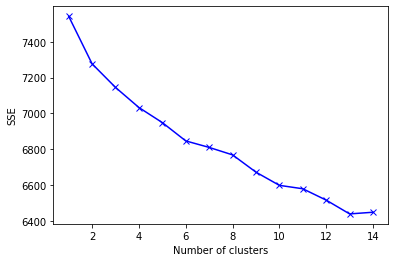

In [67]:
# Elbow method to check the what will the optimum value of number-of-clusters 
# as I am using KNN in case of DBSCAN process is different
X = Tfidf
SSE = [] 

K = range(1,15)
for k in K: 
    kmeans = KMeans(n_clusters = k, init='k-means++' )
    kmeans.fit(X) 
    SSE.append(kmeans.inertia_)

plt.plot(K, SSE, 'bx-') 
plt.xlabel('Number of clusters') 
plt.ylabel('SSE') 
plt.show() 

In [68]:
# Define number of clusters from elbow method
num_clusters = 12

#Run clustering algorithm
km = KMeans(n_clusters=num_clusters, init = 'k-means++', n_init=100)
km.fit(Tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [69]:
# create the rank of documents 
ranks = []
for i in range(1, len(all_desc)+1):
    ranks.append(i)

In [70]:
#final clusters
clusters = km.labels_.tolist()
Desc_data = { 'rank': ranks, 'Description': all_desc, 'cluster': clusters }
frame = pd.DataFrame(Desc_data, index = [clusters] , columns = ['rank', 'cluster'])

#number of description per cluster
frame['cluster'].value_counts()

0     4095
4      764
9      655
10     479
8      294
7      285
1      271
3      256
11     176
5      154
6      133
2       92
Name: cluster, dtype: int64

In [71]:
# for reproducibility
random_state = 0 

# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(Tfidf)

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(km.cluster_centers_)

In [72]:
tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2', use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(all_desc)
tv_matrix = tv_matrix.toarray()
vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,abstract,adjustment,advent,afghan,aid,air,airline,airmail,alarm,album,alphabet,alpine,angel,angels,animal,animals,anniversary,ant,antique,apple,apples,apron,area,art,ashtray,assorted,asst,asstd,babushka,baby,back,bad,badges,bag,bags,bain,bake,bakelike,baking,ball,...,war,warmer,wash,washbag,washing,wasp,water,watering,wedding,weekend,welcome,wheelbarrow,white,whiteblue,wicker,wildflower,willie,windmill,wine,winkie,wire,wish,witch,wood,wooden,woodland,wool,woolly,word,world,wrap,wrapping,wraps,wreath,writing,wsucker,xmas,yellow,yuletide,zinc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.47,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


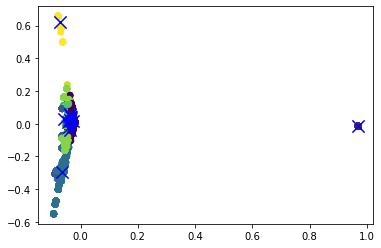

In [73]:
#plotting the clusters 
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=km.predict(Tfidf))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

<h2><b>Question 2</b></h2>

<p>Given a list of integer intervals defined by (start, end), where start is inclusive and end is exclusive, write a function that returns the sum of the integers in the union of all the intervals. For example, given:</p>

<p>intervals = [
    (1, 5),
    (3, 7),
    (10, 12),
]</p>

<p>We can see that the union of all intervals would be [1, 7) + [10, 12), which results in a return value of 42 (1+2+3+4+5+6+10+11).</p>

<p>In solving this problem, document the function and demonstrate that it works for all edge cases.</p>

<p><b>First for loop is implementing the union of the intervals and second loop is calculating the sum of the given union produced by previous for loop.
Whole functionality is enclod inside the method named "sum_intervals".</p></b>

<p>I have implemented 2 test cases also for checking purpose.</p>

In [88]:
def sum_interval(data_list):
  b = []
  sums=0
  for begin,end in sorted(data_list):
      if b and b[-1][1] >= begin - 1:
          b[-1] = (b[-1][0], end)
      else:
          b.append((begin, end))
  print("Unions of the lists are:",b)
  for i in range(0,len(b)):
      num_1 = b[i][0]
      num_2 = b[i][1]
      nums = list(range(num_1,num_2))
      sum_in_loop = sum(nums)
      sums += sum_in_loop
  return print("Sum of the union is:",sums)

In [89]:
test_1 = [(1, 5), (3,7), (10, 12)]
sum_interval(test_1)

Unions of the lists are: [(1, 7), (10, 12)]
Sum of the union is: 42


In [90]:
test_2 = [(7, 10), (11, 13), (11, 15), (14, 20), (23, 39)]
sum_interval(test_2)

Unions of the lists are: [(7, 20), (23, 39)]
Sum of the union is: 657
